# Understanding Correlations and Multicollinearity

## What is Correlation?

Correlation measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1:  

- A **positive correlation** (closer to 1) means that as one variable increases, the other tends to increase.  
- A **negative correlation** (closer to -1) means that as one variable increases, the other tends to decrease.  
- A correlation near **0** suggests little to no linear relationship between the variables.  

In the context of the `mtcars` dataset, examining correlations can help us understand how different vehicle attributes (e.g., horsepower, weight, fuel efficiency) relate to one another and to our target variable, `am`, which represents the transmission type (0 = automatic, 1 = manual).  

## Extending Correlation to Multicollinearity  

While correlation between a predictor and the target variable is useful for feature selection, high correlation between predictors themselves—known as **multicollinearity**—can be problematic in machine learning models, especially linear models. Multicollinearity occurs when two or more independent variables are strongly correlated, making it difficult to determine their individual contributions to the outcome.  

For example, in the `mtcars` dataset, features like **weight (`wt`)** and **horsepower (`hp`)** may both be correlated with transmission type (`am`), but they might also be highly correlated with each other. If both are included in a predictive model, it can lead to:  

- Instability in coefficient estimates  
- Reduced interpretability  
- Potential performance degradation in some models  

To detect multicollinearity, we can examine correlation matrices and heatmaps to spot highly correlated predictors. A general rule of thumb is that if two independent variables have a correlation above **0.7 or 0.8**, it may be advisable to remove or combine one of them. Note that this is just one consideration. It might not be necessary to do so if the performance of a model is predictable when including both.

Next, we will visualize the correlation matrix to identify potential multicollinearity before selecting features for our classification model.  

## Visualizing Correlations in the `mtcars` Dataset  

To better understand the relationships between variables, we will compute a **correlation matrix** and visualize it using a **heatmap**. This will allow us to identify features that are strongly correlated with our target variable (`am`) and detect potential multicollinearity among predictors.  

### Compute and Display the Correlation Matrix



In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

# Compute correlation matrix and round to 3 decimal places
corr_matrix = mtcars.corr().round(2)

# Display correlation matrix
print(corr_matrix)


       mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
mpg   1.00 -0.85 -0.85 -0.78  0.68 -0.87  0.42  0.66  0.60  0.48 -0.55
cyl  -0.85  1.00  0.90  0.83 -0.70  0.78 -0.59 -0.81 -0.52 -0.49  0.53
disp -0.85  0.90  1.00  0.79 -0.71  0.89 -0.43 -0.71 -0.59 -0.56  0.39
hp   -0.78  0.83  0.79  1.00 -0.45  0.66 -0.71 -0.72 -0.24 -0.13  0.75
drat  0.68 -0.70 -0.71 -0.45  1.00 -0.71  0.09  0.44  0.71  0.70 -0.09
wt   -0.87  0.78  0.89  0.66 -0.71  1.00 -0.17 -0.55 -0.69 -0.58  0.43
qsec  0.42 -0.59 -0.43 -0.71  0.09 -0.17  1.00  0.74 -0.23 -0.21 -0.66
vs    0.66 -0.81 -0.71 -0.72  0.44 -0.55  0.74  1.00  0.17  0.21 -0.57
am    0.60 -0.52 -0.59 -0.24  0.71 -0.69 -0.23  0.17  1.00  0.79  0.06
gear  0.48 -0.49 -0.56 -0.13  0.70 -0.58 -0.21  0.21  0.79  1.00  0.27
carb -0.55  0.53  0.39  0.75 -0.09  0.43 -0.66 -0.57  0.06  0.27  1.00


### Plot a Heatmap of the Correlation Matrix 

A heatmap helps visualize how strongly each pair of variables is correlated. Darker or more intense colors indicate stronger positive or negative correlations.


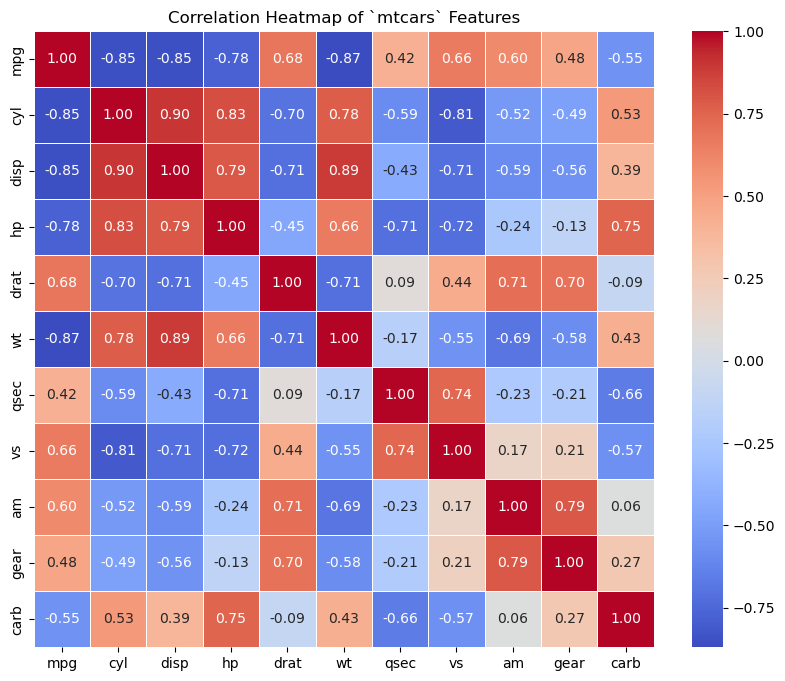

In [55]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of `mtcars` Features")
plt.show()


## Identifying Highly Correlated Variables

From the heatmap and correlation matrix, we can identify:  

1. **Variables correlated with `am` (transmission type)**  
   - The strength and direction of correlation tell us which features might be useful for predicting `am`.  
   - Features with a **high absolute correlation** (e.g., above 0.4 or below -0.4) are often good candidates.  

2. **Potential multicollinearity among predictors**  
   - If two independent variables have a high correlation (typically above **0.7 or 0.8**), they may contain redundant information.  
   - Including both in a model could lead to instability or overfitting.  

### Extracting the Correlation of Each Variable with `am`


In [4]:
# Sort correlations with 'am' in descending order
corr_with_am = corr_matrix["am"].sort_values(ascending=False)
print(corr_with_am)


am      1.000000
gear    0.794059
drat    0.712711
mpg     0.599832
vs      0.168345
carb    0.057534
qsec   -0.229861
hp     -0.243204
cyl    -0.522607
disp   -0.591227
wt     -0.692495
Name: am, dtype: float64


### Interpreting the Results 

- The variables at the top of the list have the strongest **positive correlation** with `am`, meaning cars with higher values of these features are more likely to have **manual** transmissions.  
- The variables at the bottom have the strongest **negative correlation**, meaning higher values are more associated with **automatic** transmissions.  
- If two predictors are highly correlated with each other (e.g., `hp` and `wt`), we may need to choose only one to avoid multicollinearity.  

Next, we will explore methods to handle multicollinearity and refine our feature selection for predicting transmission type.

# Basic Strategies for Handling Multicollinearity 

Now that we've visualized correlations in the `mtcars` dataset, we need to decide how to handle variables that are highly correlated with each other. If two predictor variables are strongly related, they might provide **redundant information** to the model. This can:  

- Make it harder to interpret which features are truly driving predictions.  
- Lead to instability in models that rely on coefficient estimation (e.g., linear regression).  
- Increase the risk of overfitting when using complex models.  

### How to Identify Multicollinearity?

From the heatmap and correlation matrix, we can spot:  

1. **Variables strongly correlated with `am`** (our target).  
2. **Predictor variables that are strongly correlated with each other** (potential multicollinearity).  

A general rule of thumb is:  
- If two variables have a correlation **above 0.7 or 0.8**, they might contain overlapping information.  
- We may consider **keeping only one of them** for modeling.  

### Listing Highly Correlated Pairs

To make an informed decision, let’s extract and display pairs of features that have high correlations.


In [60]:
# Find pairs of features with high correlation
high_corr_pairs = []

# Set threshold for high correlation
threshold = 0.7

# Iterate through correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):  # Avoid duplicate pairs
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.index[j], corr_matrix.iloc[i, j]))

# Display highly correlated variable pairs
high_corr_pairs


[('cyl', 'mpg', -0.85),
 ('disp', 'mpg', -0.85),
 ('disp', 'cyl', 0.9),
 ('hp', 'mpg', -0.78),
 ('hp', 'cyl', 0.83),
 ('hp', 'disp', 0.79),
 ('drat', 'disp', -0.71),
 ('wt', 'mpg', -0.87),
 ('wt', 'cyl', 0.78),
 ('wt', 'disp', 0.89),
 ('wt', 'drat', -0.71),
 ('qsec', 'hp', -0.71),
 ('vs', 'cyl', -0.81),
 ('vs', 'disp', -0.71),
 ('vs', 'hp', -0.72),
 ('vs', 'qsec', 0.74),
 ('am', 'drat', 0.71),
 ('gear', 'am', 0.79),
 ('carb', 'hp', 0.75)]

### Choosing Which Variable to Keep  

So here is my thinking. I noticed that **am** is highly correlated with **drat** which is highly correlated with **disp** which is hihgly correlated with **cyl**. So maybe we can remove **disp** and **cyl** from consideration if we wish to build a classifier.


# Building a Decision Tree Classifier to Predict Transmission (`am`)

- We define `X` (independent variables) and `y` (target variable, `am`).  
- We split the data into **training (80%)** and **testing (20%)** sets.  


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = mtcars.drop(columns=['am', 'disp','cyl'])  
y = mtcars['am']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize 
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy_no_disp_cyl = accuracy_score(y_test, y_pred)
print(f"Accuracy without 'disp' and 'cyl': {accuracy_no_disp_cyl:.3f}")


Accuracy without 'disp' and 'cyl': 0.857


### Train the Model Using All Variables   

That accuracy value was actually pretty good. To compare performance, we now train the model **without dropping any of the predictor variables to see what the resulting accuracy is. This might be surprising (or not). Remember our approach has been very basic here. We are not using any automated methods or approaches to remove or keep specific variables. We just have this idea of correlations and multi-collinearity. So here is our RandomForestClassifier using the full version of **mtcars**.


In [102]:
# Define features including 'disp'
X_full = mtcars.drop(columns=['am'])  # Keep all variables
y_full = mtcars['am']

# Split data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, 
                                                                        y_full, 
                                                                        test_size=0.2, 
                                                                        random_state=42, 
                                                                        stratify=y_full)

# Train Decision Tree on full feature set
clf_full = RandomForestClassifier(random_state=42)
clf_full.fit(X_train_full, y_train_full)

# Predict and evaluate
y_pred_full = clf_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test_full, y_pred_full)
print(f"Accuracy with full data: {accuracy_full:.3f}")


Accuracy with full data: 0.714


Comparing the Results**  

| Model                 | Features Used     | Accuracy |
|-----------------------|------------------|----------|
| Without "disp" and "cyl"      | Removed "disp" and "cyl"  | 0.857 |
| With all vars        | Used all features | 0.714 |

- If accuracy **remains similar**, it suggests that removing "disp" and "cyl" had **little impact** on predictive power.
- If accuracy **is better**, it suggests that removing "disp" and "cyl" had a positive impact on predictive power. 
- If accuracy **drops after removing "disp" and "cyl"**, it means "disp" and "cyl" provided useful information for prediction.

This simple comparison helps us understand whether dropping a correlated feature affects model performance. 

### Introduction to Sequential Feature Selection 

So this approach can be automated. We could write our own for loop to systematically investigate the influence and extent on how we could remove variables, say one or two at a time, and then evaluate the accuracy value. It turnes out we don't have to do that as scikit has some methods to help us with this. Let's discuss **Sequential Feature Selection**. Note that this idea is not at all unique to scikit. The idea has been implemented in other languages. Here is a breakdown:

**Sequential Feature Selection** (SFS) is an iterative method for selecting the most relevant features for predictive modeling. It works by evaluating subsets of features and selecting a set that provides the best model performance. There are two main types of sequential selection: **Forward Selection** and **Backward Selection**.

- **Forward Selection** begins with no features and progressively adds the most important features, one at a time, based on the performance improvement they provide to the model. This method is ideal when you have many features and want to start with the simplest model, gradually increasing its complexity.

- **Backward Selection**, on the other hand, starts with all features and iteratively removes the least important ones. This method can be useful when you're dealing with a large set of features and want to see which ones contribute the least to model performance. It helps identify features that might be redundant or unnecessary.

Both methods are valuable, and the choice between them depends on the dataset and the modeling goals:
- **Forward Selection** is useful when you're uncertain which features are important and prefer to start simple.
- **Backward Selection** is ideal when you have a larger set of features and wish to avoid overfitting by pruning irrelevant or redundant features.

In either case, **Sequential Feature Selection** provides a systematic approach to feature selection, helping improve model interpretability and performance by focusing on the most relevant features. 

In this next example we will implement Backward Selection since that is what we were doing in the above example. This will help us figure out what examples might be the most influential as a group in producing a good accuracy.


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
X = mtcars.drop(columns=['am'])  # Remove 'am'
y = mtcars['am']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize SequentialFeatureSelector with backward selection
sfs_backward = SequentialFeatureSelector(rf_clf, n_features_to_select=5, direction='backward')

# Fit the model
sfs_backward.fit(X_train, y_train)

# Get the selected features
selected_features_backward = X_train.columns[sfs_backward.get_support()]
print(f"Selected Features (Backward Selection): {selected_features_backward}")

# Train model with selected features
X_train_selected_backward = X_train[selected_features_backward]
X_test_selected_backward = X_test[selected_features_backward]
rf_clf.fit(X_train_selected_backward, y_train)

# Make predictions and evaluate
y_pred_selected_backward = rf_clf.predict(X_test_selected_backward)
accuracy_selected_backward = accuracy_score(y_test, y_pred_selected_backward)
print(f"Accuracy with selected features (Backward): {accuracy_selected_backward:.3f}")


Selected Features (Backward Selection): Index(['wt', 'qsec', 'vs', 'gear', 'carb'], dtype='object')
Accuracy with selected features (Backward): 0.857


Let's now do Forward Selection wherein we start with a model that uses no variables and then systematically ads in more variables.

In [70]:

# Prepare the data
X = mtcars.drop(columns=['am'])  # Remove 'disp' based on earlier analysis
y = mtcars['am']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize SequentialFeatureSelector with forward selection
sfs_forward = SequentialFeatureSelector(rf_clf, n_features_to_select=5, direction='forward')

# Fit the model
sfs_forward.fit(X_train, y_train)

# Get the selected features
selected_features_forward = X_train.columns[sfs_forward.get_support()]
print(f"Selected Features (Forward Selection): {selected_features_forward}")

# Train model with selected features
X_train_selected_forward = X_train[selected_features_forward]
X_test_selected_forward = X_test[selected_features_forward]
rf_clf.fit(X_train_selected_forward, y_train)

# Make predictions and evaluate
y_pred_selected_forward = rf_clf.predict(X_test_selected_forward)
accuracy_selected_forward = accuracy_score(y_test, y_pred_selected_forward)
print(f"Accuracy with selected features (Forward): {accuracy_selected_forward:.3f}")


Selected Features (Forward Selection): Index(['mpg', 'cyl', 'hp', 'wt', 'qsec'], dtype='object')
Accuracy with selected features (Forward): 0.714


### Reasons for Differences in Accuracy:

**Forward Selection** starts with no features and adds the most important features one at a time. This means that it could potentially leave out a feature that may be important early on, which could lower performance at the beginning.

**Backward Selection**, on the other hand, starts with all features and removes the least important ones. By starting with the full set, it allows the model to capture all relationships between features and their influence on the target variable from the get-go, and only removes the least useful ones. This might result in a more accurate model early on, which explains the higher performance you observed.

**Overfitting vs. Underfitting:**

With **Backward Selection**, since we start with all features, the model has more information to work with, which may lead to a higher accuracy if those features were indeed useful. However, it's also possible that the model could be overfitting to the training data if it includes irrelevant features.

**Forward Selection** might leave out some features early on that are helpful in capturing the underlying patterns of the data. As it builds up features one by one, it might not always pick the best set, especially if the order of features added isn't optimal.

**Feature Importance and Redundancy:**

**Backward Selection** can identify and remove redundant or less important features, which may lead to a more efficient model in terms of computation and performance.

**Forward Selection**, while adding features iteratively, might not always identify the most important ones immediately, resulting in a model that is less accurate at the start.

**Randomness in Model Performance:**

It's also important to remember that **RandomForestClassifier** can have some variability due to its inherent randomness (even with the same set of features). If your train-test split or the way features are selected varies across runs, it could explain some performance differences.

### What to Do Next:

- **Cross-validation**: To reduce the influence of randomness and give a more stable estimate of the model’s performance, you can apply **cross-validation**. This will help you assess whether one approach is consistently better than the other across different splits of the data.

In [72]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation for the Forward Selection model
# Using the selected features from Forward Selection

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)


selected_features_forward = ['mpg', 'cyl', 'hp', 'wt', 'qsec']
X_train_selected_forward = X_train[selected_features_forward]

# Perform k-fold cross-validation with RandomForestClassifier
cv_scores_forward = cross_val_score(rf_clf, X_train_selected_forward, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation scores for Forward Selection model: {cv_scores_forward}")
print(f"Mean Accuracy (Forward Selection): {np.mean(cv_scores_forward):.3f}")
print(f"Standard Deviation (Forward Selection): {np.std(cv_scores_forward):.3f}")

# Cross-validation for the Backward Selection model
# Using the selected features from Backward Selection
selected_features_backward = ['wt', 'qsec', 'vs', 'gear', 'carb']
X_train_selected_backward = X_train[selected_features_backward]

# Perform k-fold cross-validation with RandomForestClassifier
cv_scores_backward = cross_val_score(rf_clf, X_train_selected_backward, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation scores for Backward Selection model: {cv_scores_backward}")
print(f"Mean Accuracy (Backward Selection): {np.mean(cv_scores_backward):.3f}")
print(f"Standard Deviation (Backward Selection): {np.std(cv_scores_backward):.3f}")


Cross-validation scores for Forward Selection model: [0.8 1.  1.  1.  1. ]
Mean Accuracy (Forward Selection): 0.960
Standard Deviation (Forward Selection): 0.080
Cross-validation scores for Backward Selection model: [0.8 1.  0.8 1.  1. ]
Mean Accuracy (Backward Selection): 0.920
Standard Deviation (Backward Selection): 0.098


## Visualizing Correlations in the `Pima` Dataset  

To better understand the relationships between variables, we will compute a **correlation matrix** and visualize it using a **heatmap**. This will allow us to identify features that are strongly correlated with our target variable (`diabetes`) and detect potential multicollinearity among predictors.  

### Compute and Display the Correlation Matrix


In [79]:
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/pima.csv"
pima = pd.read_csv(url, sep=',')

# Convert 'pos' to 1 and 'neg' to 0 in the 'Outcome' column
pima['diabetes'] = pima['diabetes'].map({'pos': 1, 'neg': 0})

# Compute the correlation matrix
corr_matrix = pima.corr().round(2)

# Display the correlation matrix
print(corr_matrix)

          pregnant  glucose  pressure  triceps  insulin  mass  pedigree   age  \
pregnant      1.00     0.13      0.14    -0.08    -0.07  0.02     -0.03  0.54   
glucose       0.13     1.00      0.15     0.06     0.33  0.22      0.14  0.26   
pressure      0.14     0.15      1.00     0.21     0.09  0.28      0.04  0.24   
triceps      -0.08     0.06      0.21     1.00     0.44  0.39      0.18 -0.11   
insulin      -0.07     0.33      0.09     0.44     1.00  0.20      0.19 -0.04   
mass          0.02     0.22      0.28     0.39     0.20  1.00      0.14  0.04   
pedigree     -0.03     0.14      0.04     0.18     0.19  0.14      1.00  0.03   
age           0.54     0.26      0.24    -0.11    -0.04  0.04      0.03  1.00   
diabetes      0.22     0.47      0.07     0.07     0.13  0.29      0.17  0.24   

          diabetes  
pregnant      0.22  
glucose       0.47  
pressure      0.07  
triceps       0.07  
insulin       0.13  
mass          0.29  
pedigree      0.17  
age           0.24  


### Plot a Heatmap 

So now let's get a "pretty plot" of the correlations. We don't have as many variablesa as we did with mtcars and the correlations aren't as generally strong as we might like. We do so 

In [78]:
# Sort correlations with 'am' in descending order
corr_with_diabetes = corr_matrix["diabetes"].sort_values(ascending=False)
print(corr_with_diabetes)


diabetes    1.00
glucose     0.47
mass        0.29
age         0.24
pregnant    0.22
pedigree    0.17
insulin     0.13
pressure    0.07
triceps     0.07
Name: diabetes, dtype: float64


## Identifying Highly Correlated Variables

So here we have to lower our threshold significantly becuase correlations are not generally strong. This means that we likely do not have multi-collinearty here or at least not to a strong extent. We could experiment. 

In [85]:
# Find pairs of features with high correlation
high_corr_pairs = []

# Set threshold for high correlation
threshold = 0.3

# Iterate through correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):  # Avoid duplicate pairs
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.index[j], corr_matrix.iloc[i, j]))

# Display highly correlated variable pairs
high_corr_pairs


[('insulin', 'glucose', 0.33),
 ('insulin', 'triceps', 0.44),
 ('mass', 'triceps', 0.39),
 ('age', 'pregnant', 0.54),
 ('diabetes', 'glucose', 0.47)]

One observation I have here is that **diabetes** is correlated with **glucose** which makes sense. And we see that **glucose** is correlated with **insulin**. So we may not need both to build a model. We also note that **inuslin** is also correlated with **triceps** and **mass**. This is similar to what we did with the **mtcars** dataset. 

# Building A Decision Tree Classifier for Pima

In this case we will build a model while dropping out **insulin, triceps**, and **mass**.

In [95]:
# Drop 'Insulin' and 'SkinThickness' (Triceps)
X = pima.drop(columns=['insulin', 'triceps', 'diabetes','mass'])  
y = pima['diabetes']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.3f}")

Random Forest Model Accuracy: 0.708


So how does this compare to the **full** model? Looks like the full model at least in this case, has a better acciracy. We might need to use cross validation on this.  

In [96]:
# Drop 'Insulin' and 'SkinThickness' (Triceps)
X = pima.drop(columns=['diabetes'])  
y = pima['diabetes']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.3f}")

Random Forest Model Accuracy: 0.747


In [97]:
# Prepare the data
X = pima.drop(columns=['diabetes'])  # Remove 'am'
y = pima['diabetes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize SequentialFeatureSelector with backward selection
sfs_backward = SequentialFeatureSelector(rf_clf, n_features_to_select=5, direction='backward')

# Fit the model
sfs_backward.fit(X_train, y_train)

# Get the selected features
selected_features_backward = X_train.columns[sfs_backward.get_support()]
print(f"Selected Features (Backward Selection): {selected_features_backward}")

# Train model with selected features
X_train_selected_backward = X_train[selected_features_backward]
X_test_selected_backward = X_test[selected_features_backward]
rf_clf.fit(X_train_selected_backward, y_train)

# Make predictions and evaluate
y_pred_selected_backward = rf_clf.predict(X_test_selected_backward)
accuracy_selected_backward = accuracy_score(y_test, y_pred_selected_backward)
print(f"Accuracy with selected features (Backward): {accuracy_selected_backward:.3f}")


Selected Features (Backward Selection): Index(['pregnant', 'glucose', 'mass', 'pedigree', 'age'], dtype='object')
Accuracy with selected features (Backward): 0.753


Let's do cross validation on this

In [98]:
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)


# Cross-validation for the Backward Selection model
# Using the selected features from Backward Selection
selected_features_backward = ['pregnant', 'glucose', 'mass', 'pedigree', 'age']
X_train_selected_backward = X_train[selected_features_backward]

# Perform k-fold cross-validation with RandomForestClassifier
cv_scores_backward = cross_val_score(rf_clf, X_train_selected_backward, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation scores for Backward Selection model: {cv_scores_backward}")
print(f"Mean Accuracy (Backward Selection): {np.mean(cv_scores_backward):.3f}")
print(f"Standard Deviation (Backward Selection): {np.std(cv_scores_backward):.3f}")


Cross-validation scores for Backward Selection model: [0.7398374  0.76422764 0.7398374  0.79674797 0.81147541]
Mean Accuracy (Backward Selection): 0.770
Standard Deviation (Backward Selection): 0.029


# **Understanding Mutual Information (MI)**

## **What is Mutual Information?**
Mutual Information (MI) is a concept from information theory that quantifies the **dependence between two variables**. It measures how much knowing the value of one variable **reduces uncertainty** about another.

In machine learning, MI helps determine how much information a feature provides about the target variable. Unlike simple correlation, which only captures **linear** relationships, **MI can detect both linear and non-linear dependencies**, making it a powerful tool for feature selection.

---

## **How is Mutual Information Different from Correlation?**

| Property | Correlation (Pearson) | Mutual Information |
|----------|----------------------|-------------------|
| **Measures** | Linear relationships only | Any kind of relationship (linear or non-linear) |
| **Range** | Between -1 and 1 | Always ≥ 0 |
| **Handles Non-Linearity?** | No | Yes |
| **Works with Categorical Targets?** | No | Yes |

- **Correlation** measures how strongly two variables move together in a **linear fashion**. A correlation close to 1 or -1 indicates a strong linear relationship, while a value close to 0 suggests no linear correlation.
- **Mutual Information, however, can detect more complex dependencies.** For example, a feature that has no correlation with the target variable (correlation ≈ 0) **may still contain useful predictive information** if the relationship is non-linear.

---

## **Why is MI Useful for Feature Selection?**
Mutual Information is particularly valuable when dealing with **categorical target variables**, such as predicting whether a patient has diabetes (0 or 1). It helps us determine **which features contribute the most information** to our prediction problem.

For example:
- In the **Pima Indians Diabetes dataset**, features like **Glucose, BMI, and Age** are likely to have **high MI scores** because they strongly influence diabetes risk.
- On the other hand, a feature with a very low MI score likely provides little additional predictive power and may be a candidate for removal.

---

## **How is MI Computed?**
Mathematically, the **Mutual Information** between two variables \(X\) and \(Y\) is defined as:

\[
MI(X, Y) = \sum_{x \in X} \sum_{y \in Y} P(x, y) \log \left( \frac{P(x, y)}{P(x) P(y)} \right)
\]

Where:
- \( P(x, y) \) is the **joint probability** of \( X \) and \( Y \) occurring together.
- \( P(x) \) and \( P(y) \) are the **marginal probabilities** of \( X \) and \( Y \).
- The **logarithm measures the deviation from independence**, meaning MI is **zero if \(X\) and \(Y\) are completely independent**.

---

## **Key Takeaways**
MI **quantifies** how much information one variable provides about another.  
It works well with **categorical targets** like diabetes (0 or 1).  
Unlike correlation, MI **captures both linear and non-linear relationships**.  
High MI scores indicate **important features** for prediction.  
Features with very low MI scores might be **irrelevant or redundant**.  

---

Now let's compute **Mutual Information scores** for the Pima Indians Diabetes dataset and visualize them.


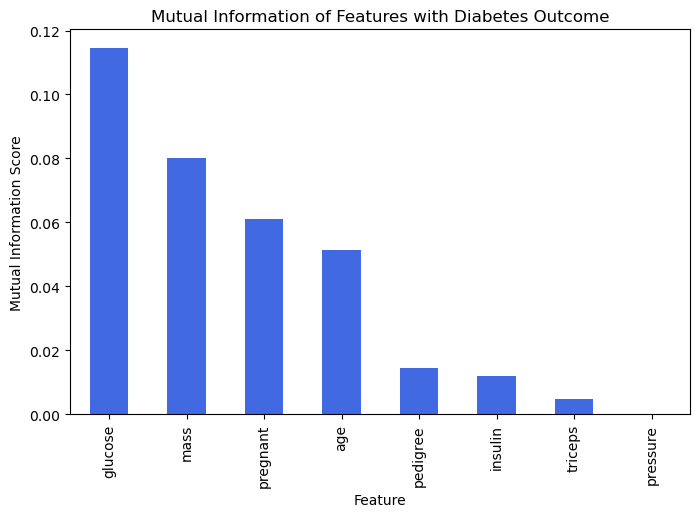

In [103]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert to Pandas Series for better visualization
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot Mutual Information scores
plt.figure(figsize=(8, 5))
mi_series.plot(kind="bar", color="royalblue")
plt.xlabel("Feature")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information of Features with Diabetes Outcome")
plt.show()